In [11]:
#第一步
import pandas as pd
#读取公益项目数据
path='C:/Users/HP/Desktop/analyze/1124.xlsx'
xiangmu=pd.read_excel(path)
#读取公益组织数据并重新转存
path1='C:/Users/HP/Desktop/analyze/爱心组织全部10.4原件.xlsx'
aixin=pd.read_excel(path1)
outpath='C:/Users/HP/Desktop/analyze/aixinzuzhi.xlsx'
aixin.to_excel(outpath)


In [60]:
#第二步
import pandas as pd
#利用第一步整理好的数据再整理去掉空格以便联结表格
path='C:/Users/HP/Desktop/analyze/aixinzuzhi.xlsx'
aixin=pd.read_excel(path，index_col=0)
#遍历昵称项，去除昵称前后的空格
for i in range(2723):
    aixin.loc[i,'昵称']=aixin.loc[i,'昵称'].strip()
outpath='C:/Users/HP/Desktop/analyze/aixinzuzhi.xlsx'

In [20]:
#在excel中，修改公益组织“昵称”列名改为项目发起人，将公益组织及公益项目融合
from pandas import Series,DataFrame,merge
import pandas as pd
path='C:/Users/HP/Desktop/analyze/1124.xlsx'
xiangmu=pd.read_excel(path)
path1='C:/Users/HP/Desktop/analyze/aixinzuzhi.xlsx'
aixin=pd.read_excel(path1)
data=merge(aixin,xiangmu,on='项目发起人')#融合

data.to_excel('C:/Users/HP/Desktop/analyze/datamerge.xlsx')#转存为datamerge文件


In [6]:
#计算各个项目发起人的项目数
import pandas as pd
data=pd.read_excel('C:/Users/HP/Desktop/analyze/datamerge.xlsx',index_col=0)
xm_number=data['项目发起人'].value_counts()
xm_number.to_excel('C:/Users/HP/Desktop/analyze/xm_number.xlsx')

In [21]:
#在对数据进行线性回归前进行数据预处理
#将项目核实为真时间转化为布尔数，核实过为1
#只检验以募集资金为准的项目，删除募集资金为无的项目
#各个将变量归一化
#红蓝V作为虚拟变量
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
path='C:/Users/HP/Desktop/analyze/datamerge统计检验用.xlsx'
data=pd.read_excel(path)
data['项目进展核实为真实的时间'][data['项目进展核实为真实的时间']=='无']=0#无项目核实时间的为0
data['项目进展核实为真实的时间'][data['项目进展核实为真实的时间']!=0]=1
data=data[data['目标金额']!='无']#保留 目标金额 非空的项目
data['目标金额']=data['目标金额'].astype(int)
data['筹款进度']=data['筹款进度'].astype(float)
data['微博认证（蓝V/黄V）'][data['微博认证（蓝V/黄V）']=='蓝V']=0#蓝V用户为0
data['微博认证（蓝V/黄V）'][data['微博认证（蓝V/黄V）']!=0]=1# 其他为1
print('微博用户类型分布为%s'% data['微博认证（蓝V/黄V）'].value_counts())#输出用户类型分布
data.rename(columns={'微博认证（蓝V/黄V）':'用户类型','项目描述字数统计':'描述字数','第几次求助':'求助次数'},inplace=True)
data.to_excel('统计检验.xlsx')

F:\python\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
F:\python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
F:\python\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
F:\python\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value

微博用户类型分布为0    16809
1     1497
Name: 微博认证（蓝V/黄V）, dtype: int64


In [102]:
import pandas as pd
import numpy as np
data=pd.read_excel('统计检验.xlsx')
data=data[['用户类型','求助次数','筹款进度','描述字数','目标金额']]
data.目标金额=np.log(data.目标金额+3)
data.求助次数=data.求助次数/data.求助次数.max()
data.描述字数=data.描述字数/data.描述字数.max()#将该列变量归一化
data.to_excel('统计检验用.xlsx')


In [47]:
data=pd.read_excel('统计检验.xlsx')
data.corr().to_excel('相关性分析.xlsx')

In [63]:

data.describe()

,微博等级,粉丝数量,微博数量,目标金额,筹款进度,描述字数,求助次数
count,18306.000000,1.830600e+04,18306.000000,1.830600e+04,18306.000000,18306.000000,18306.000000
mean,26.018519,1.339829e+05,7938.496613,4.075789e+04,0.271834,975.694636,2.257894
std,9.104536,1.506834e+06,12073.040677,4.908734e+05,0.587150,537.763993,2.849397
min,0.000000,4.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,20.000000,2.907000e+03,1594.000000,2.400000e+03,0.010000,397.000000,1.000000
50%,25.000000,9.215000e+03,4791.000000,2.000000e+04,0.050000,954.000000,1.000000
75%,34.000000,4.015000e+04,7980.000000,5.000000e+04,0.300000,1368.000000,2.000000
max,48.000000,5.360373e+07,194414.000000,5.000000e+07,34.400000,2405.000000,29.000000


In [41]:
data=pd.read_excel('统计检验.xlsx')
data.describe().to_excel('数据统计1.xlsx')

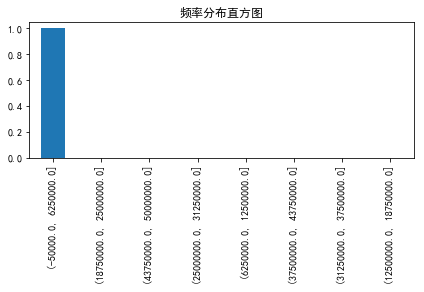

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('统计检验.xlsx')
#正常显示中文和负号
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
je=data.目标金额
pinlv=pd.cut(je,8).value_counts()/len(data)#做直方图
pinlv.plot.bar()
plt.tight_layout()
plt.title('频率分布直方图')
plt.show()

In [23]:
import statsmodels.api as sm
import pandas as pd
data=pd.read_excel('统计检验用.xlsx')
x=data[['用户类型','描述字数','求助次数','目标金额']].values
x=sm.add_constant(x)
y=data['筹款进度']
results=sm.OLS(y,x).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                   筹款进度   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     291.1
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          5.21e-243
Time:                        14:13:58   Log-Likelihood:                -15498.
No. Observations:               18102   AIC:                         3.101e+04
Df Residuals:                   18097   BIC:                         3.104e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0760      0.025     43.359      0.0

In [18]:
import pandas as pd
#读取公益项目数据
path=r'C:\Users\HP\Desktop\study\Aixin\爱心组织全部10.4原件.xlsx'

data=pd.read_excel('C:/Users/HP/Desktop/analyze/aixinzuzhi.xlsx',index_col=0)


In [1]:
import statsmodels.api as sm
import pandas as pd

data=pd.read_excel('统计检验.xlsx')
data.describe().to_excel('描述性统计1.xlsx')
data.corr()

,用户类型,微博等级,粉丝数量,微博数量,目标金额,筹款进度,描述字数,求助次数,项目进展核实为真实的时间
用户类型,1.000000,-0.007879,0.013832,0.087056,0.090435,-0.027617,-0.044546,-0.034918,-0.069346
微博等级,-0.007879,1.000000,0.144827,0.444131,0.256647,0.047897,-0.049947,-0.065743,0.314212
粉丝数量,0.013832,0.144827,1.000000,0.382580,0.068477,0.057168,-0.044778,-0.032308,-0.006946
微博数量,0.087056,0.444131,0.382580,1.000000,0.009468,0.027374,-0.101253,0.204354,0.121086
目标金额,0.090435,0.256647,0.068477,0.009468,1.000000,-0.168851,0.188569,-0.150057,0.176588
筹款进度,-0.027617,0.047897,0.057168,0.027374,-0.168851,1.000000,-0.119428,-0.002144,-0.015934
描述字数,-0.044546,-0.049947,-0.044778,-0.101253,0.188569,-0.119428,1.000000,0.003418,0.145730
求助次数,-0.034918,-0.065743,-0.032308,0.204354,-0.150057,-0.002144,0.003418,1.000000,0.142996
项目进展核实为真实的时间,-0.069346,0.314212,-0.006946,0.121086,0.176588,-0.015934,0.145730,0.142996,1.000000
